### Kushagra Sharma


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset from csv to data frame

In [2]:

df_traffic_data = pd.read_csv(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv')
df_traffic_data.dataframeName = 'TRAIN.csv'

In [156]:
df = df_traffic_data

In [3]:
df_traffic_data.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
df_traffic_data.shape

(38563, 9)

In [5]:
df_traffic_data.dtypes

date_time               object
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
dtype: object

In [6]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


#### No null value is present in the data.

In [7]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [8]:
df_traffic_data.describe(include='object')

,date_time,holiday,weather_main,weather_description
count,38563,38563,38563,38563
unique,32607,12,11,38
top,2013-04-18 22:00:00,None,Clouds,sky is clear
freq,6,38515,12680,8848


In [9]:
print("max date :" +df_traffic_data.date_time.max())
print("min date :" +df_traffic_data.date_time.min())

max date :2017-11-01 20:00:00
min date :2012-10-02 09:00:00


## Density Plots

In [88]:
def get_ax(rows = 1,cols = 1,size = 7):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows),squeeze = False)
    return fig,ax

Text(0.5, 1.0, 'Traffic Volume density plots')

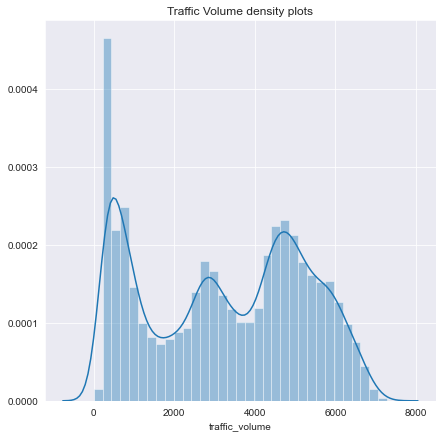

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = get_ax()
ax = ax.flatten()
sns.distplot(df_traffic_data.traffic_volume,ax = ax[0]).set_title('Traffic Volume density plots')

Text(0.5, 1.0, 'Distribution of traffic for Christmas Days')

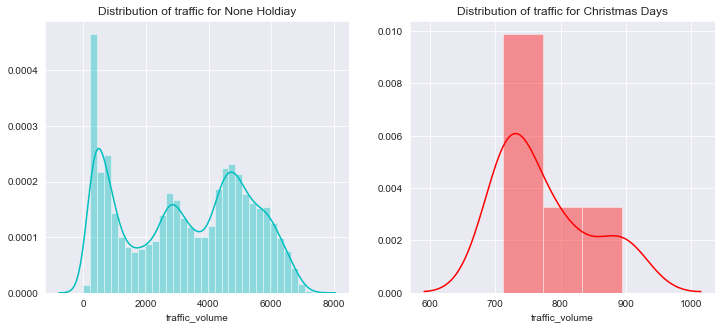

In [118]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.holiday == "None")]["traffic_volume"],color='c',ax=ax)
ax.set_title('Distribution of traffic for None Holdiay')



ax=f.add_subplot(122)
sns.distplot(df[(df.holiday == "Christmas Day")]['traffic_volume'],color='r',ax=ax)
ax.set_title('Distribution of traffic for Christmas Days')

Text(0.5, 1.0, 'Distribution of traffic for Independence Days')

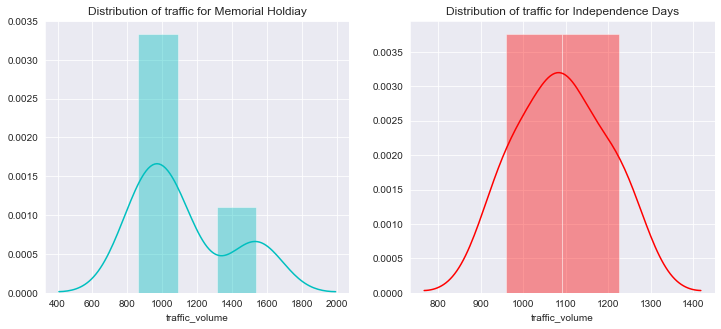

In [119]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.holiday == "Memorial Day")]["traffic_volume"],color='c',ax=ax)
ax.set_title('Distribution of traffic for Memorial Holdiay')



ax=f.add_subplot(122)
sns.distplot(df[(df.holiday == "Independence Day")]['traffic_volume'],color='r',ax=ax)
ax.set_title('Distribution of traffic for Independence Days')

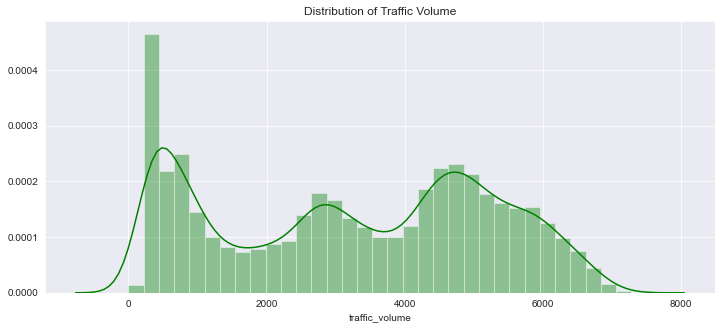

In [120]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Traffic Volume")
ax = sns.distplot(df["traffic_volume"], color = 'g')

Text(0.5, 1.0, 'Distribution of temperature and traffic volume')

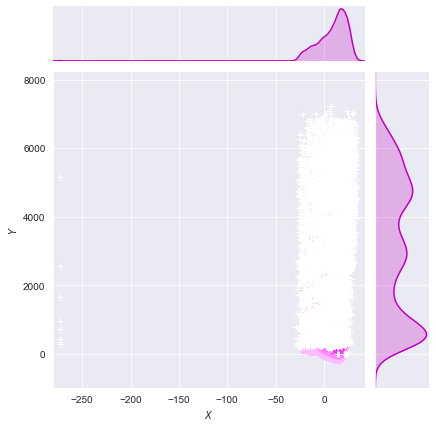

In [122]:
g = sns.jointplot(x="temp", y="traffic_volume", data = df[(df.weather_main == "Clear")],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of temperature and traffic volume')

Text(0.5, 1.0, 'Smokers and non-smokers')

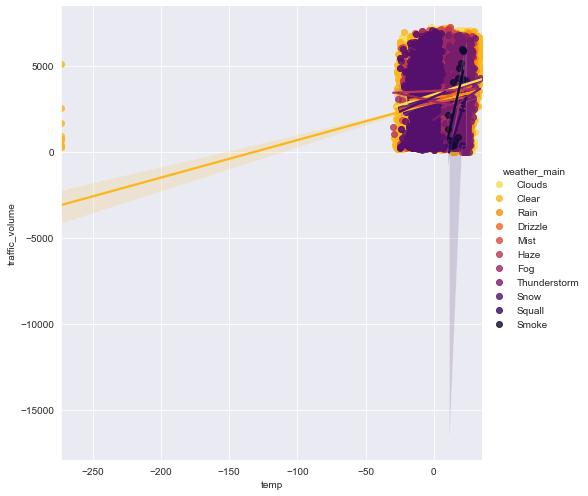

In [123]:
sns.lmplot(x="temp", y="traffic_volume", hue="weather_main", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')


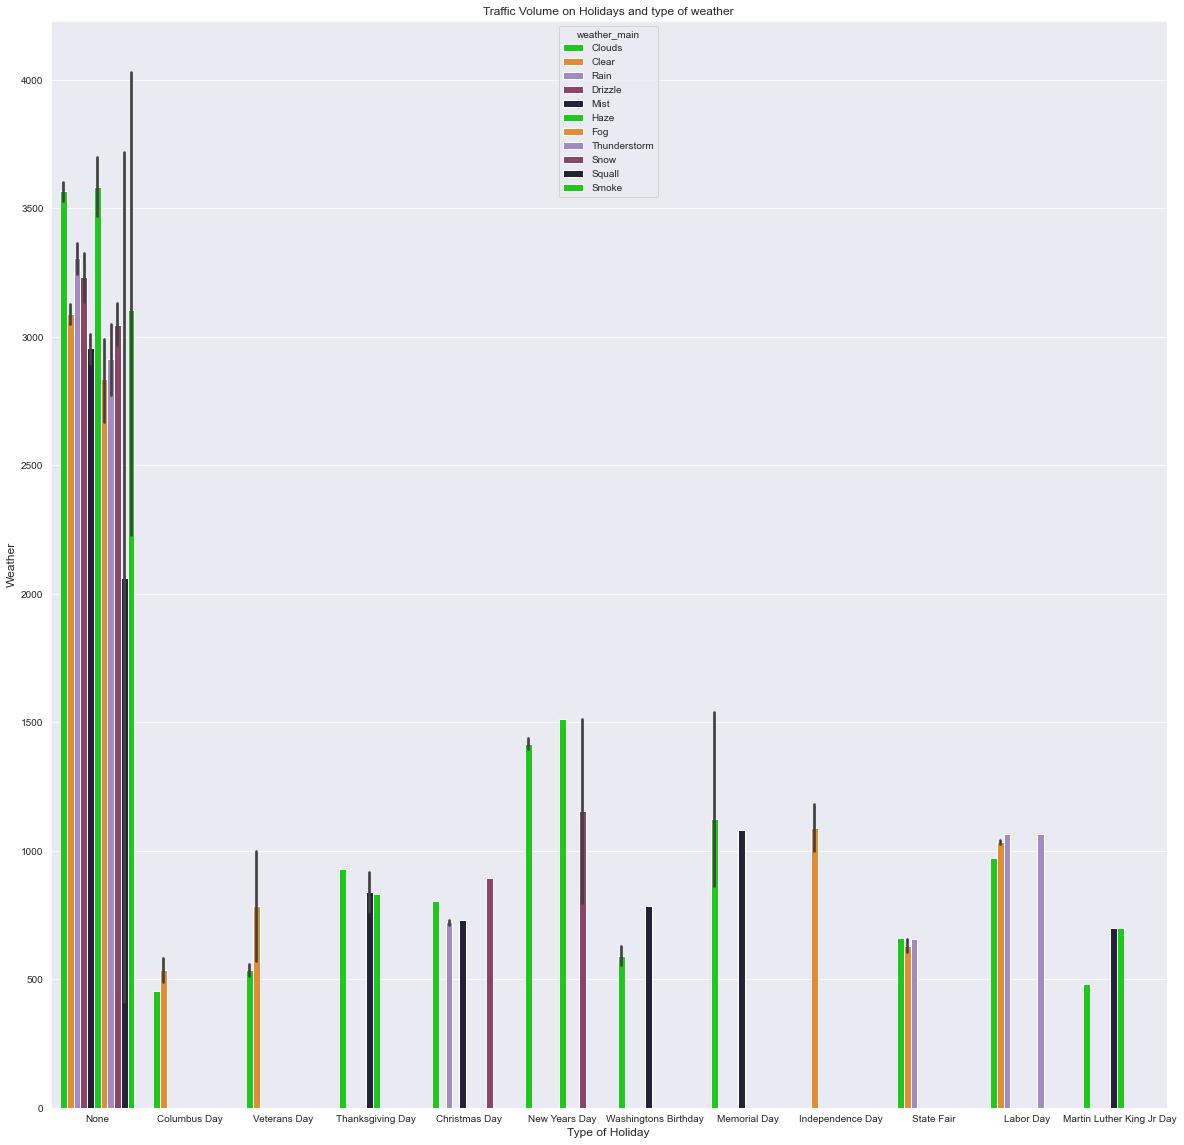

In [124]:
fig, ax = plt.subplots(figsize=(20,20))
colors = ["#00e600", "#ff8c1a","#a180cc","#963867","#1e1f3d"]
sns.barplot(x="holiday", y="traffic_volume",hue="weather_main", palette=colors, data=df)
ax.set_title("Traffic Volume on Holidays and type of weather",fontdict= {'size':12})
ax.xaxis.set_label_text("Type of Holiday",fontdict= {'size':12})
ax.yaxis.set_label_text("Weather",fontdict= {'size':12})
plt.show()

## Time Series plots

In [10]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

len_of_file = file_len(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv')
print (len_of_file)

skipped = np.setdiff1d(np.arange(len_of_file), np.arange(0,len_of_file,80))
print (skipped)

38564
[    1     2     3 ... 38561 38562 38563]


In [125]:
df['month']=pd.to_datetime(df['date_time']).dt.month
df['day']=pd.to_datetime(df['date_time']).dt.day
df['date']=pd.to_datetime(df['date_time']).dt.date
df['year']=pd.to_datetime(df['date_time']).dt.year
df['hour']=pd.to_datetime(df['date_time']).dt.hour

Text(0.5, 1.0, 'Year Vs Traffic')

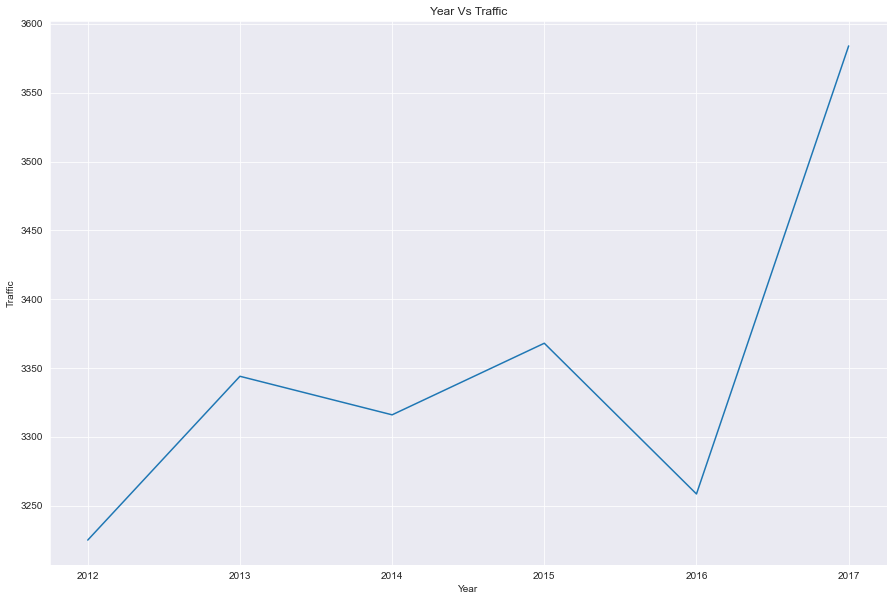

In [126]:
df.groupby('year')['traffic_volume'].median().plot()
plt.xlabel('Year ')
plt.ylabel('Traffic')
plt.title("Year Vs Traffic")

Text(0.5, 1.0, 'Traffic At particular time.')

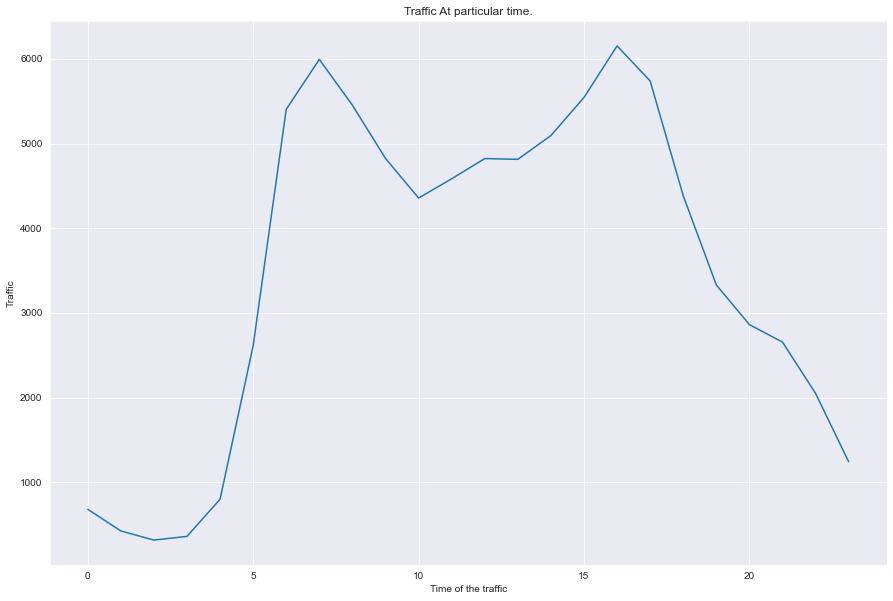

In [127]:

df.groupby('hour')['traffic_volume'].median().plot()
plt.xlabel('Time of the traffic')
plt.ylabel('Traffic')
plt.title("Traffic At particular time.")

Text(0.5, 1.0, 'Day with amout of traffic')

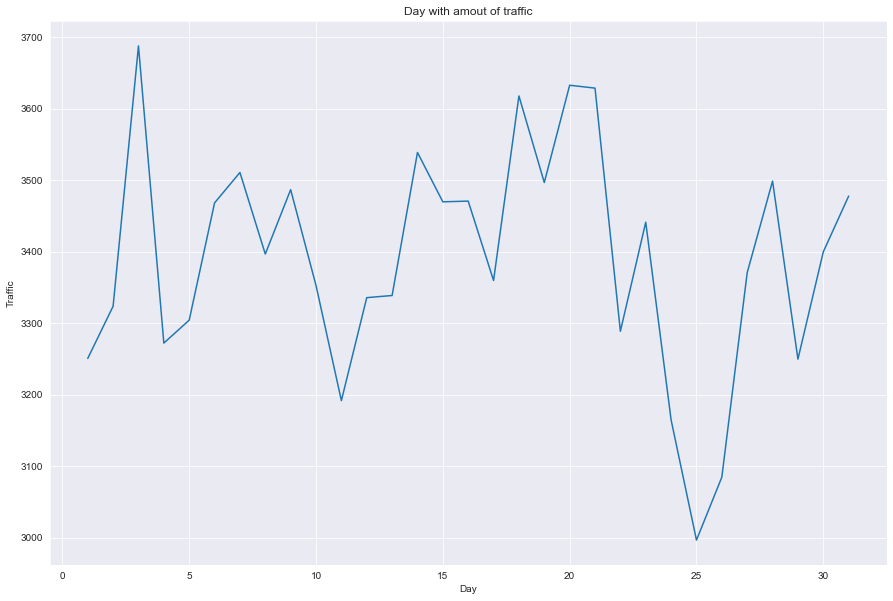

In [128]:
df.groupby('day')['traffic_volume'].median().plot()
plt.xlabel('Day')
plt.ylabel('Traffic')
plt.title("Day with amout of traffic")

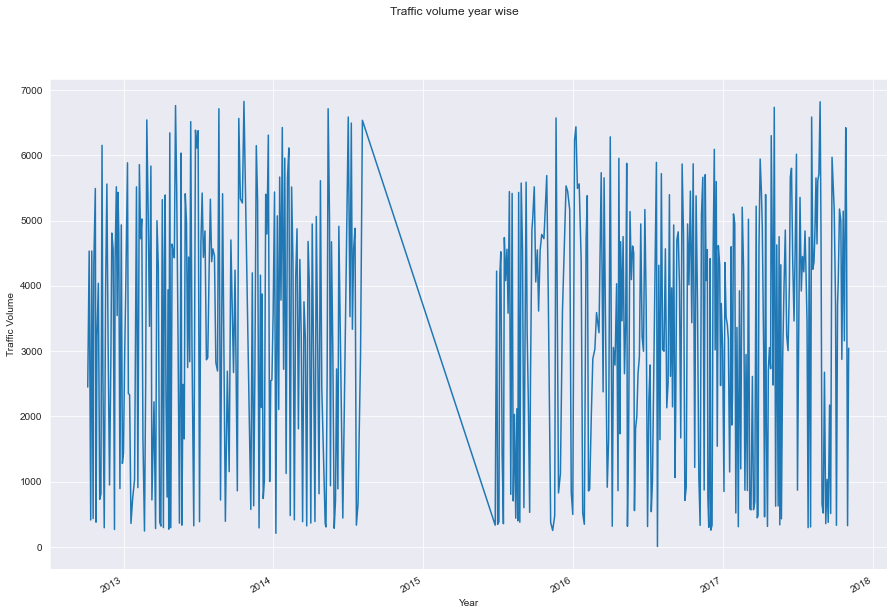

In [100]:
series = pd.read_csv(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv', header=0, index_col = 0, parse_dates=True, squeeze=True,usecols=["date_time", "traffic_volume"], skiprows=skipped)
series.plot()
plt.suptitle('Traffic volume year wise')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

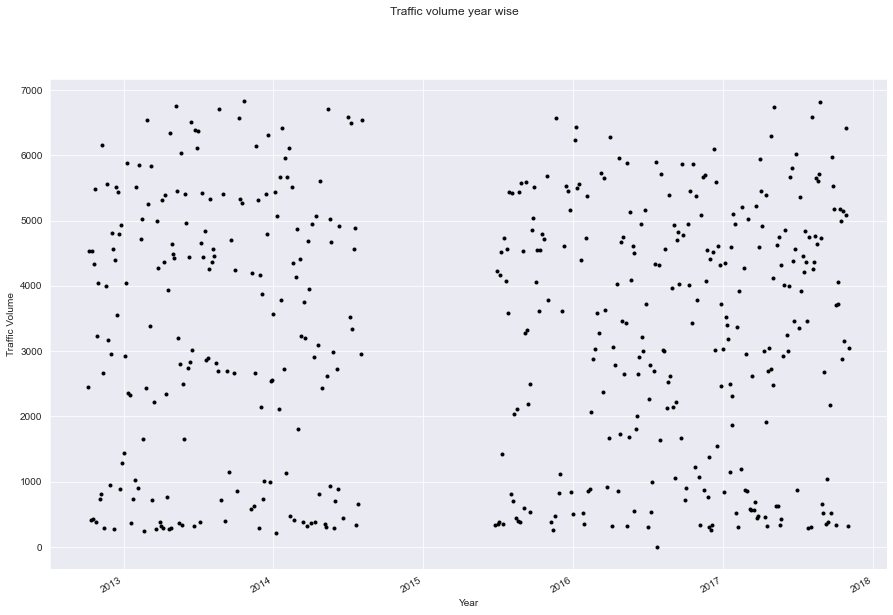

In [103]:
series = pd.read_csv(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv', header=0, index_col = 0, parse_dates=True, squeeze=True,usecols=["date_time", "traffic_volume"], skiprows=skipped)
series.plot(style='k.')
plt.suptitle('Traffic volume year wise')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

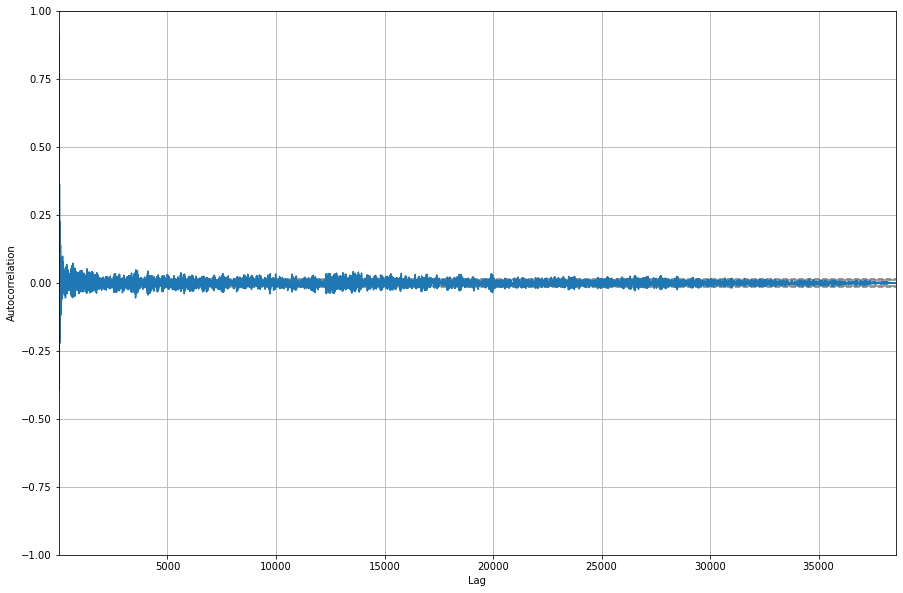

In [12]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
series = pd.read_csv(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv', header=0, index_col=0, parse_dates=True, squeeze=True,usecols=["date_time", "traffic_volume"])
autocorrelation_plot(series)
plt.show()

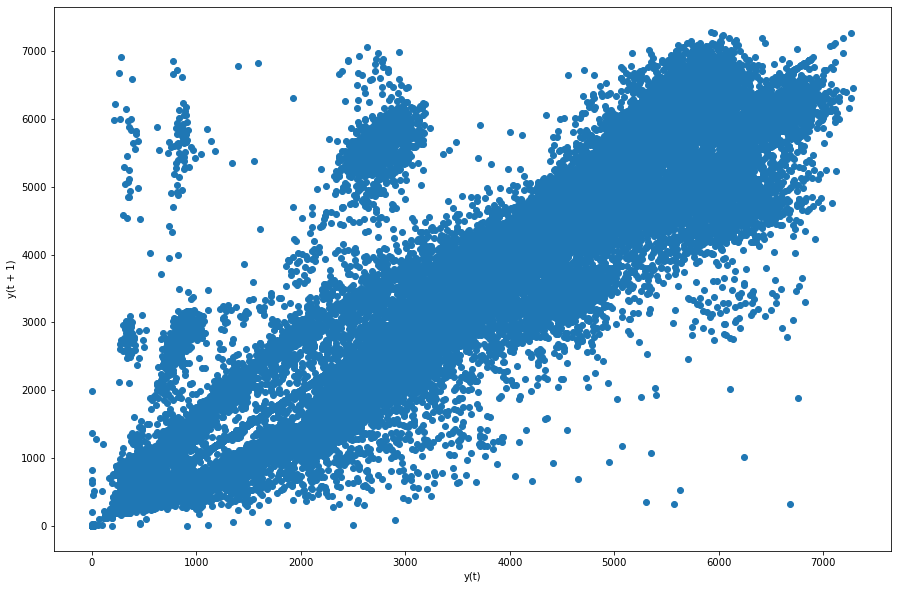

In [13]:
from pandas.plotting import lag_plot
series = pd.read_csv(r'C:\Users\kusha\Downloads\ahalytix_internship_hiring_ai_challenge-dataset\TRAIN.csv', header=0, index_col = 0, parse_dates=True, squeeze=True,usecols=["date_time", "traffic_volume"])
lag_plot(series)
plt.show()

In [159]:
df.index = pd.to_datetime(df.index, unit='d')

In [160]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2017-11-01 18:00:00,None,274.35,0.0,0.0,90,Snow,light snow,4297
2017-11-01 19:00:00,None,274.62,0.0,0.0,90,Drizzle,light intensity drizzle,3045
2017-11-01 19:00:00,None,274.62,0.0,0.0,90,Mist,mist,3045


In [162]:
data_columns = ["traffic_volume"]
df_traffic_data_mean = df[data_columns].resample('W').mean()

##### data is collected over 6 years

In [14]:
df=df_traffic_data.copy()

In [15]:
df.columns

Index(['date_time', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume'],
      dtype='object')

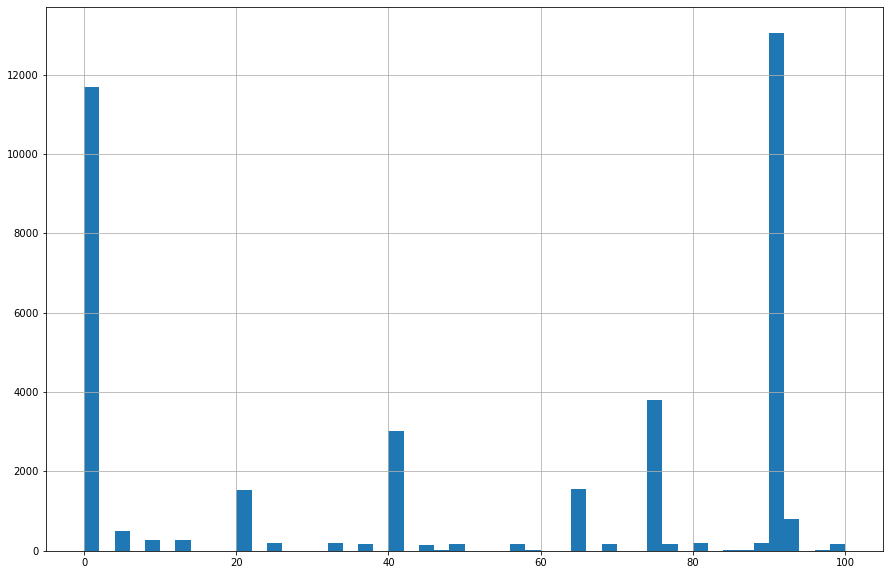

In [16]:
df.clouds_all.hist(bins=50)

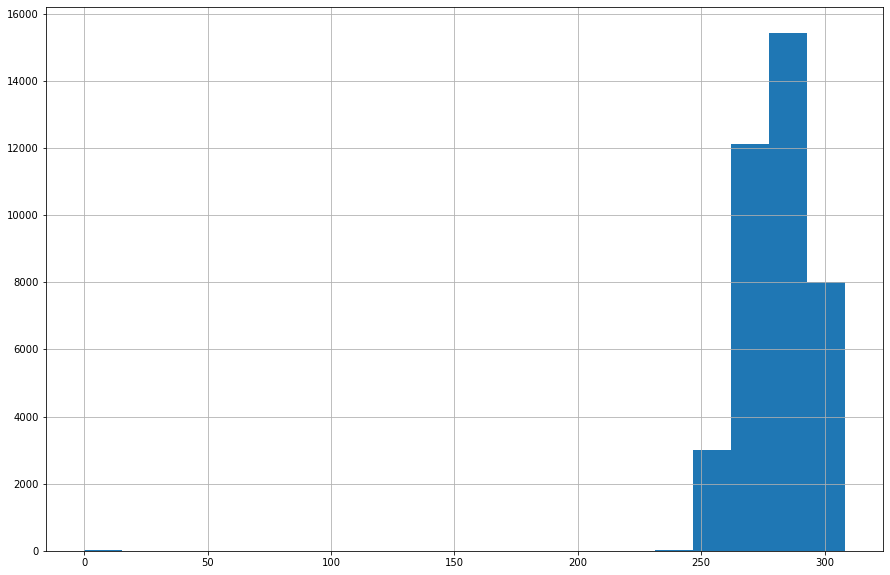

In [17]:
df.temp.hist(bins=20)

## Distribution graphs (histogram/bar graph) of column data

In [19]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [20]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [22]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


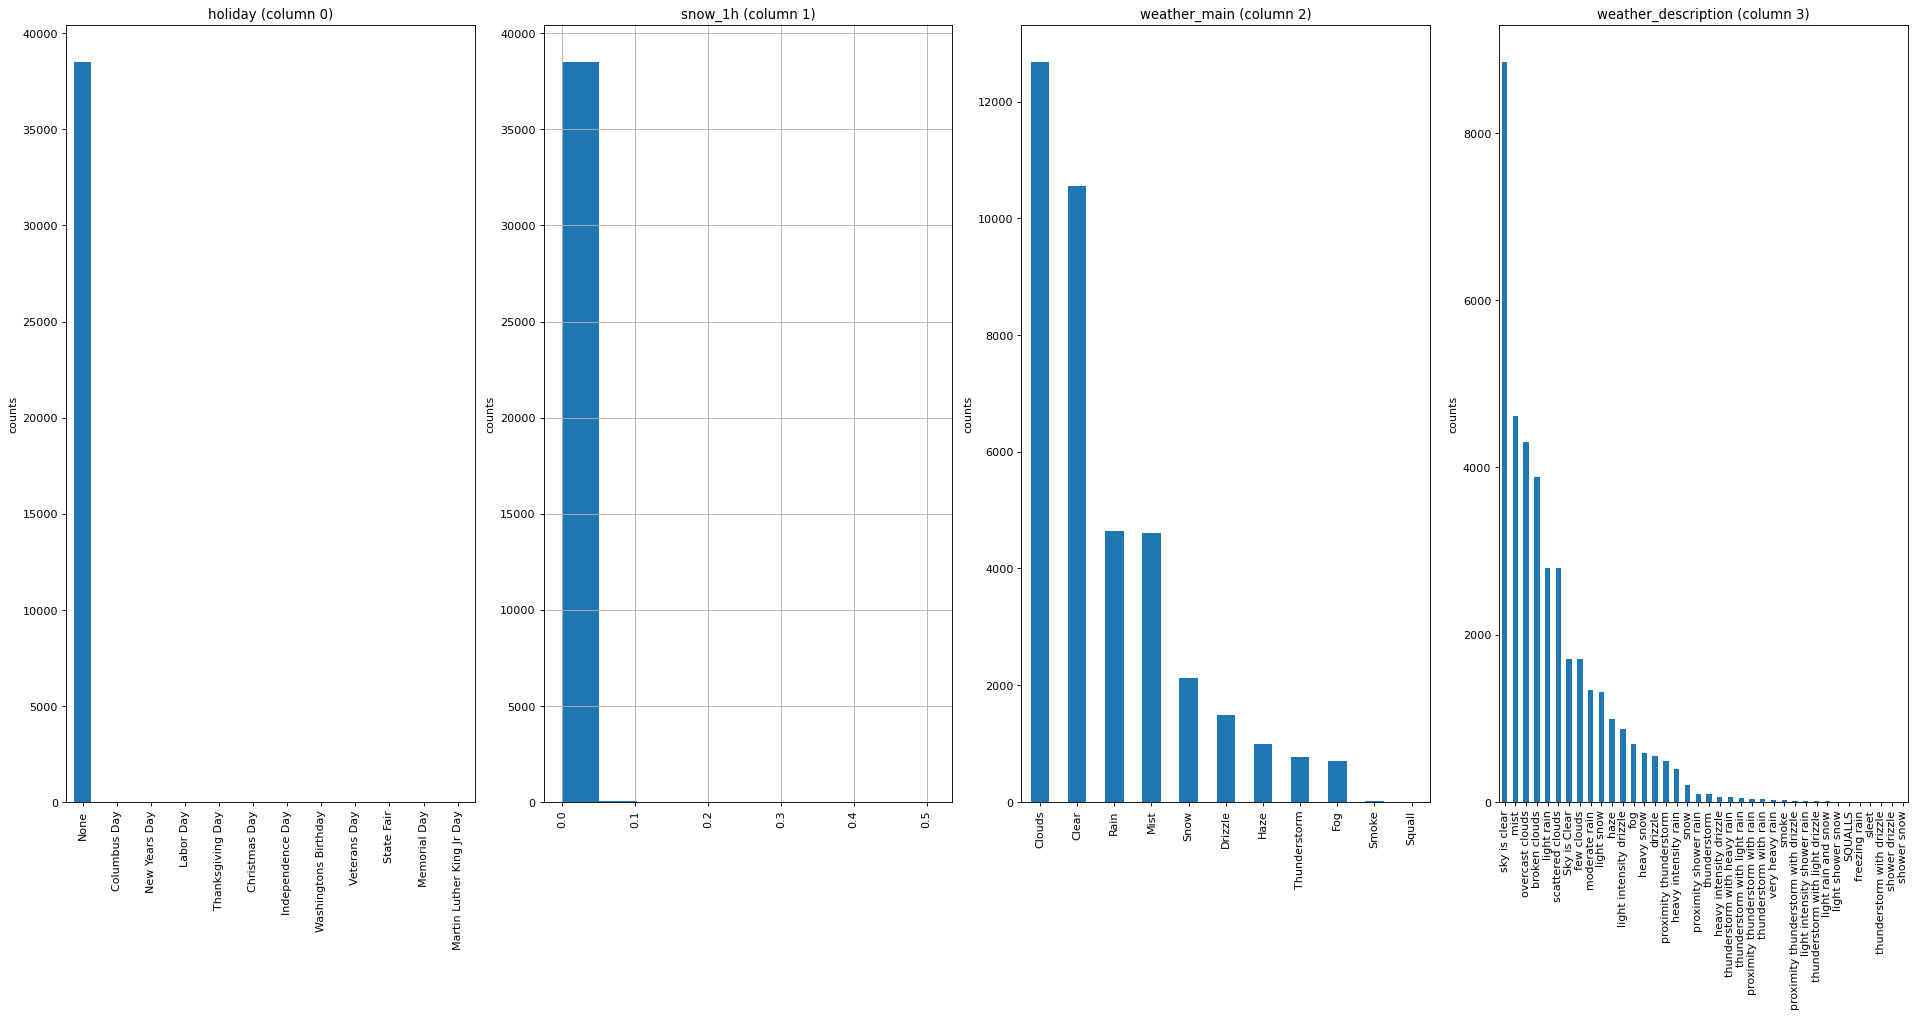

In [23]:
plotPerColumnDistribution(df_traffic_data, 10, 5)

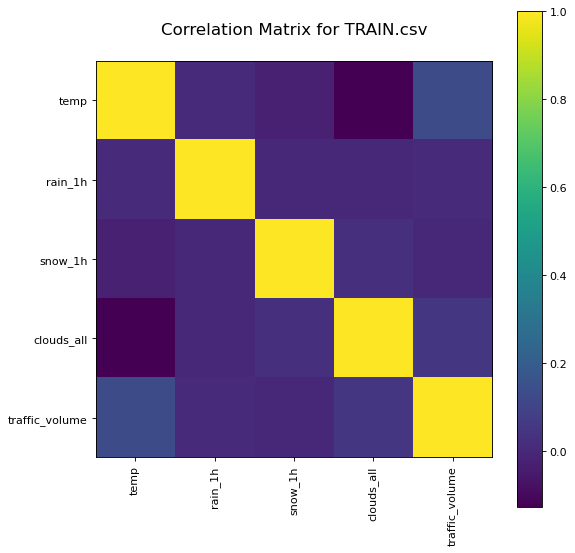

In [24]:
plotCorrelationMatrix(df_traffic_data, 8)

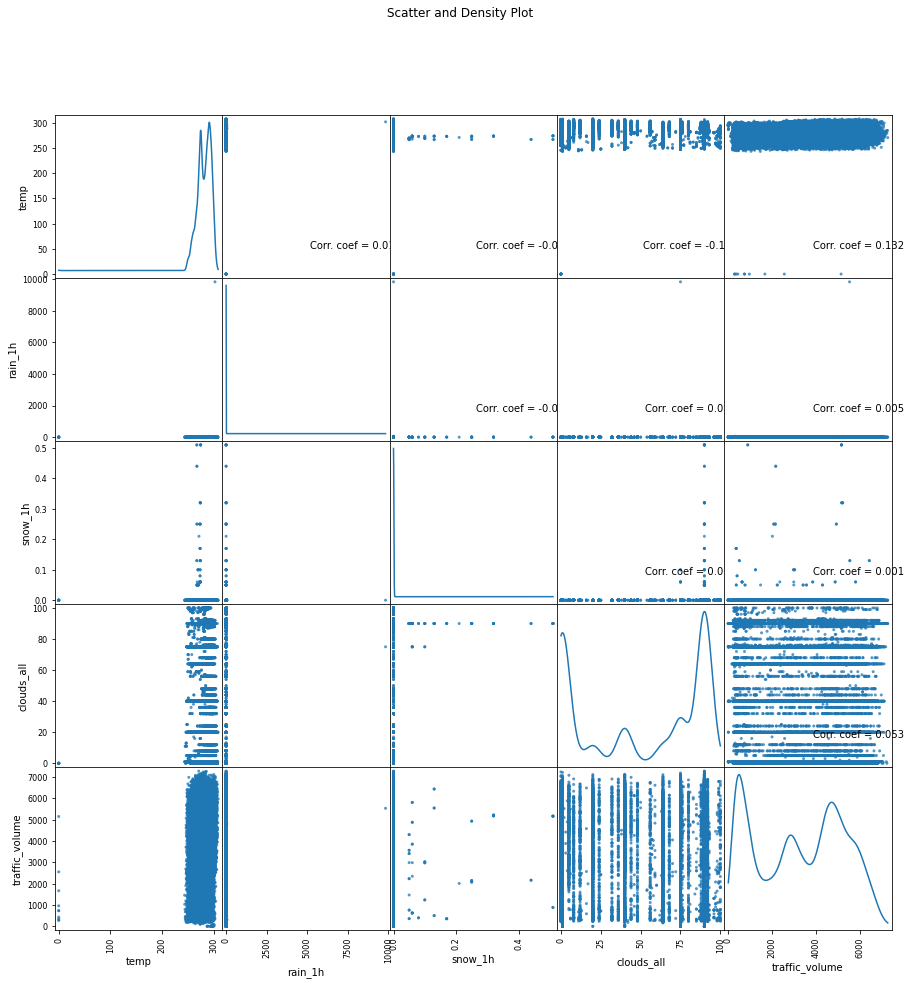

In [25]:
plotScatterMatrix(df_traffic_data, 15, 10)

### Transforming The Data Into Good form...

In [26]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [27]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

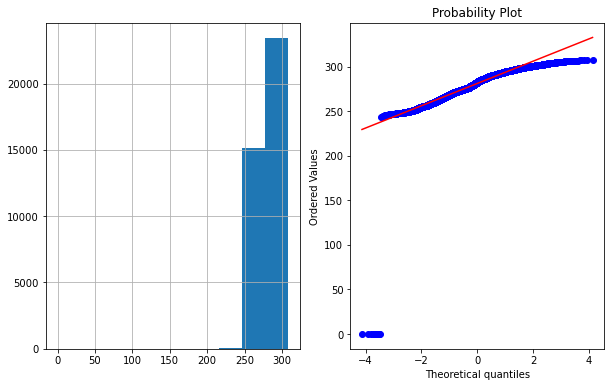

In [28]:
plot_data(df,'temp')

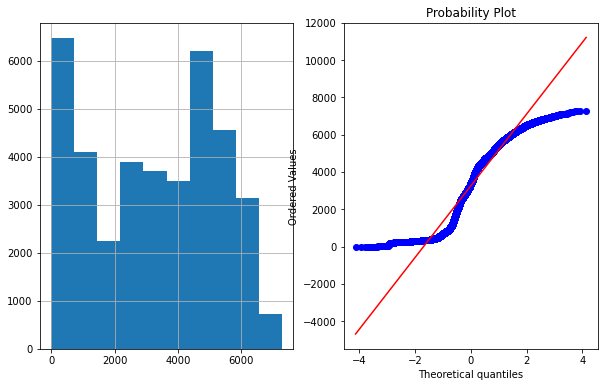

In [29]:
plot_data(df,'traffic_volume')

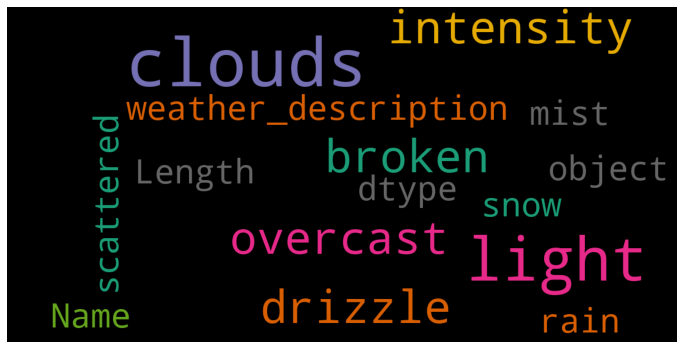

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        colormap='Dark2',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['weather_description'])

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


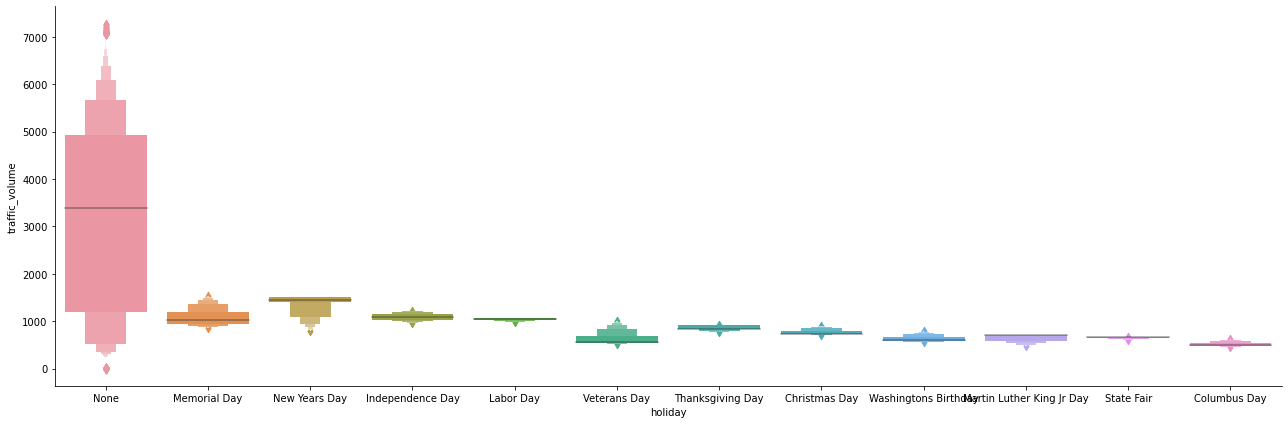

In [32]:
sns.catplot(y='traffic_volume',x='holiday',data=df.sort_values("traffic_volume",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [33]:
#As usual the traffic is the most on normal days, after that we can consider memorial days with huge amount of traffic

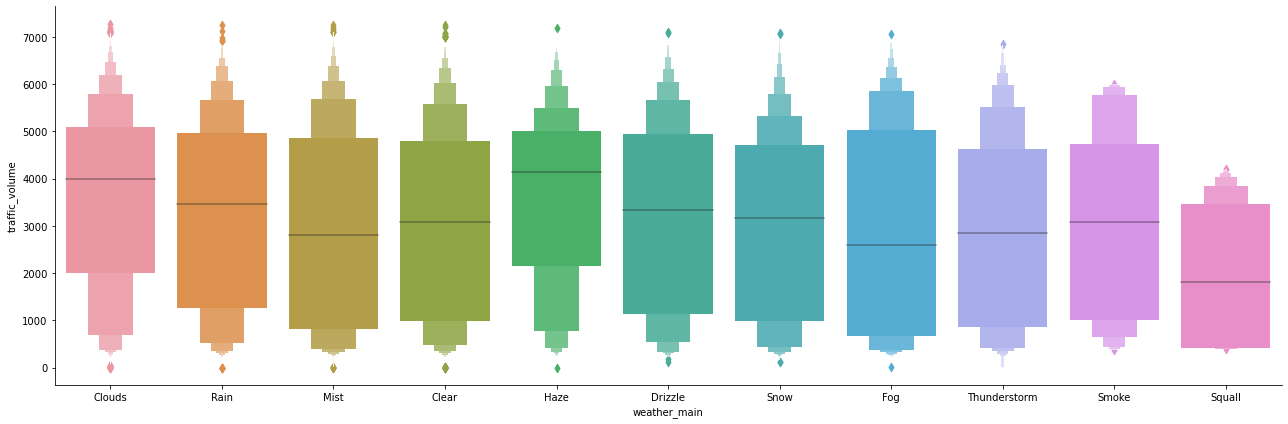

In [34]:
sns.catplot(y='traffic_volume',x='weather_main',data=df.sort_values("traffic_volume",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

## Checking the skewnwss of data

In [35]:
def distribution_check(df,Cols):
    plt.figure(figsize=(18,15))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

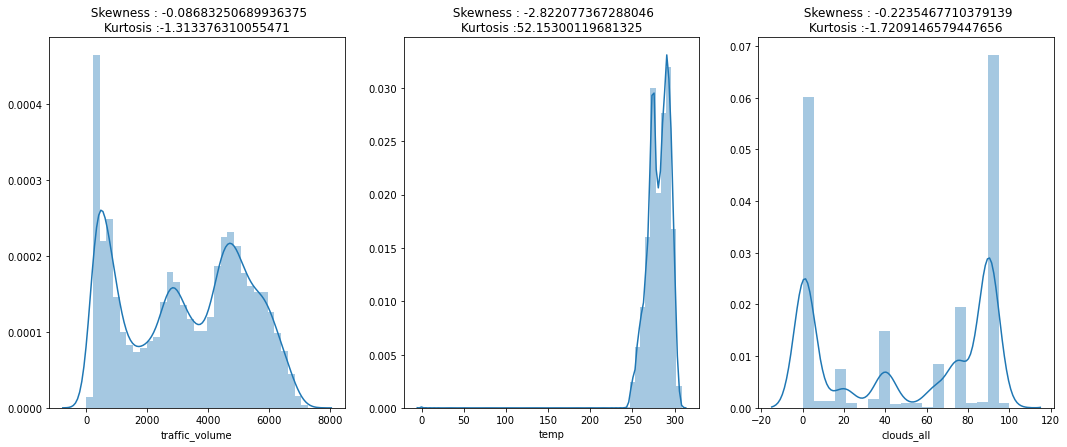

In [36]:
from scipy.stats import skew,kurtosis,zscore
distribution_check(df_traffic_data,['traffic_volume','temp','clouds_all'])


### Univariate Analysis

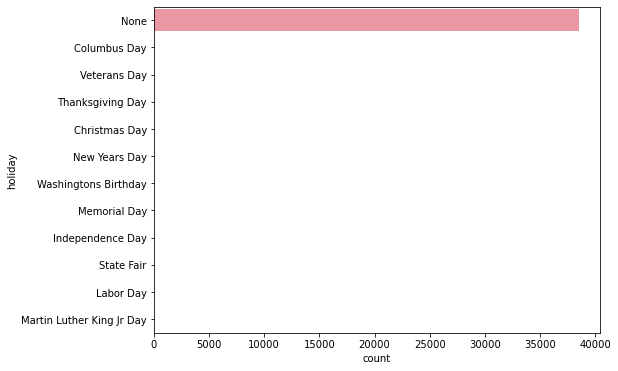

In [37]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_traffic_data)
plt.show()

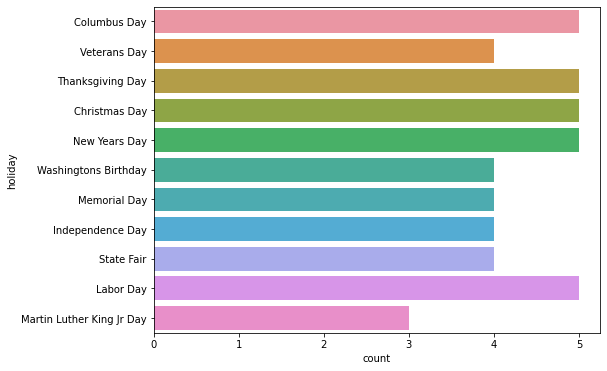

In [38]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_traffic_data.loc[df_traffic_data.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

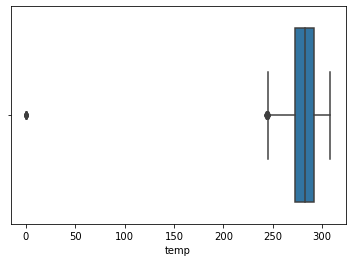

In [39]:
#plotting distribution of temperature variable
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

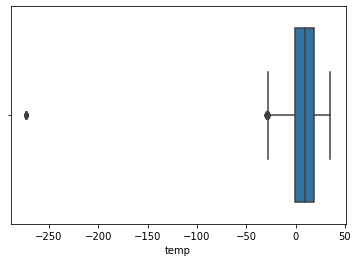

In [40]:
#Temperature is measured in Kelvin, changing to degree celsius to make it more intuitive
#convert kelvin to celsius
#(0K − 273.15)
df_traffic_data['temp'] = (df_traffic_data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

In [41]:
#There is one data point far away from the rest around -300 degrees celsius. Clearly, this is an error in recording.
#Eliminating will be eliminated in the data cleaning phase.

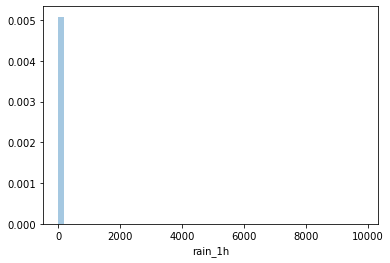

In [42]:
#Plotting rain variable
plt.figure(figsize=(6,4))
sns.distplot(df_traffic_data.rain_1h)
plt.show()
#From the distribution, it shows that the data is extremely skewed. Most of the observations are concentrated around 0.

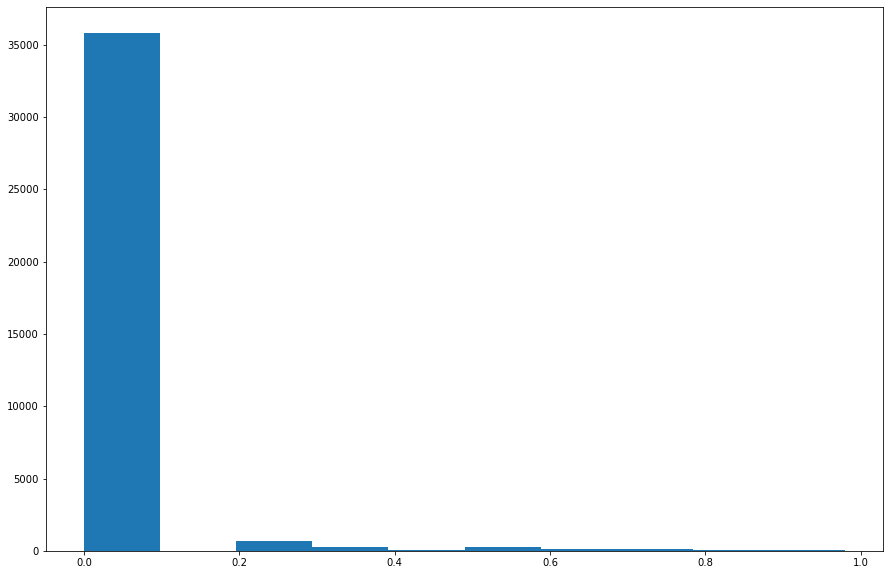

In [43]:
#Plotting observations with values less than 1mm rain shows that more than 40000 observations are around 0.
plt.hist(df_traffic_data.rain_1h.loc[df_traffic_data.rain_1h<1])
plt.show()

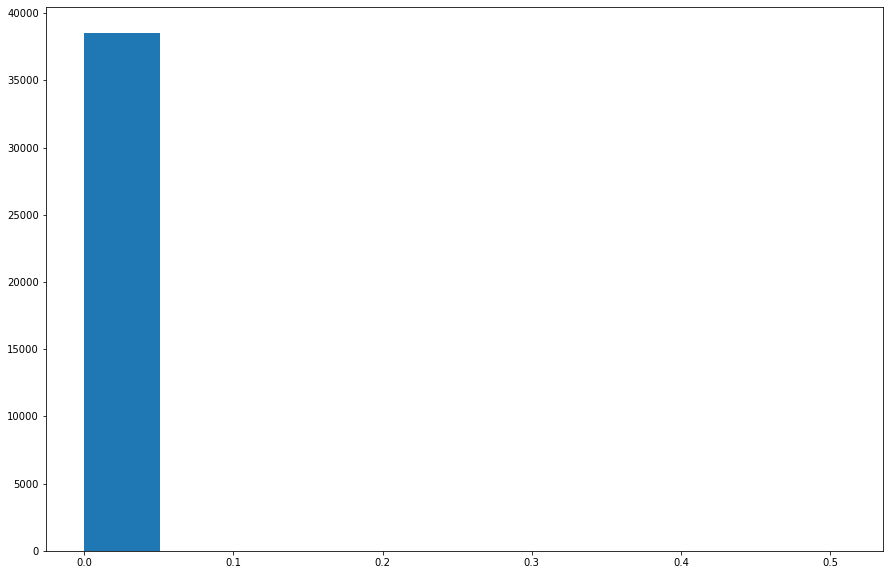

In [44]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(df_traffic_data.snow_1h)
plt.show()

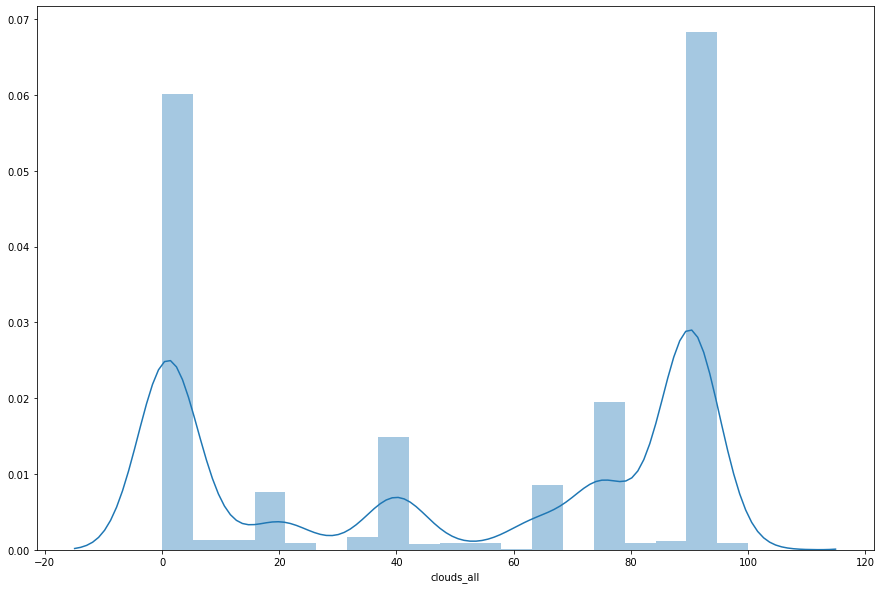

In [45]:
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(df_traffic_data.clouds_all)
plt.show()

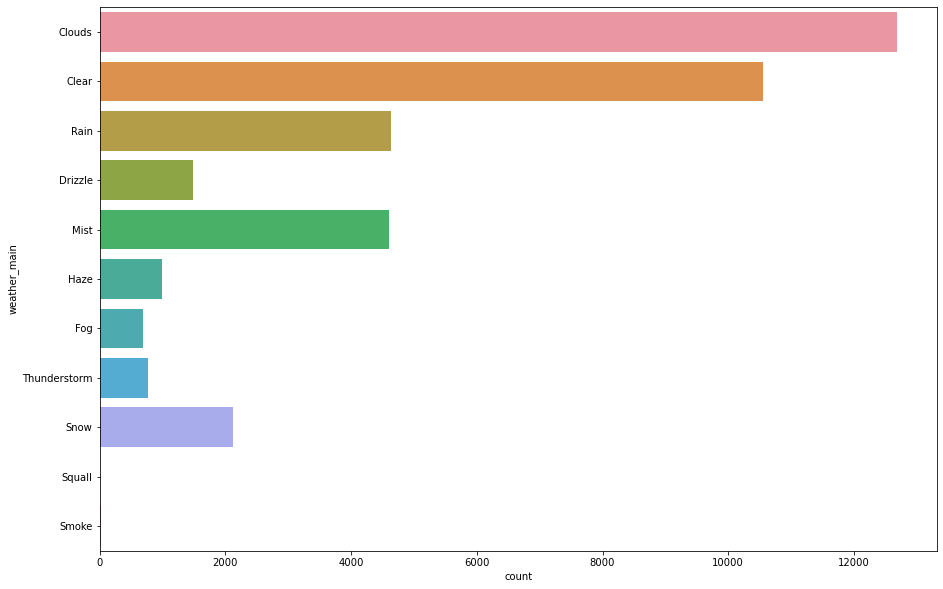

In [46]:
#exploring different categories in weather_main
sns.countplot(y='weather_main', data=df_traffic_data)

### exploring different categories in weather_description

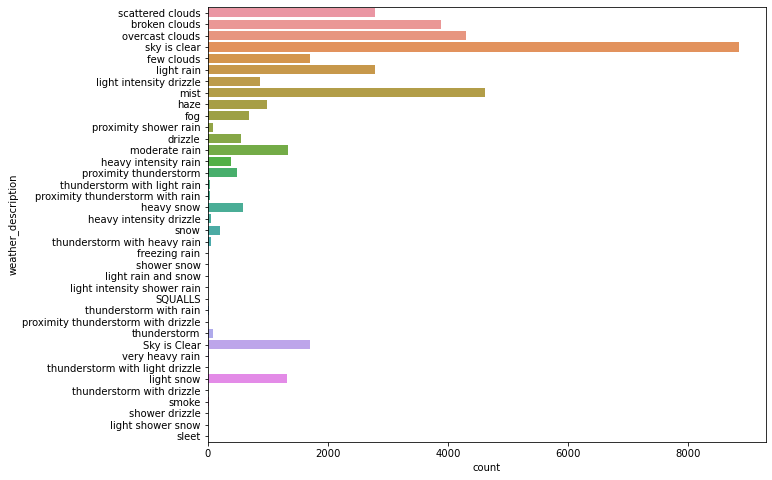

In [47]:

plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=df_traffic_data)
plt.show()

### Bivariate Analysis

Exploring relationship between traffic and other features

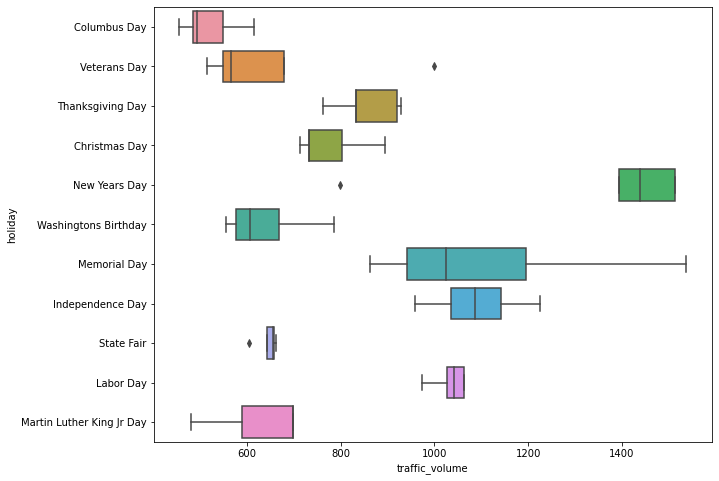

In [48]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

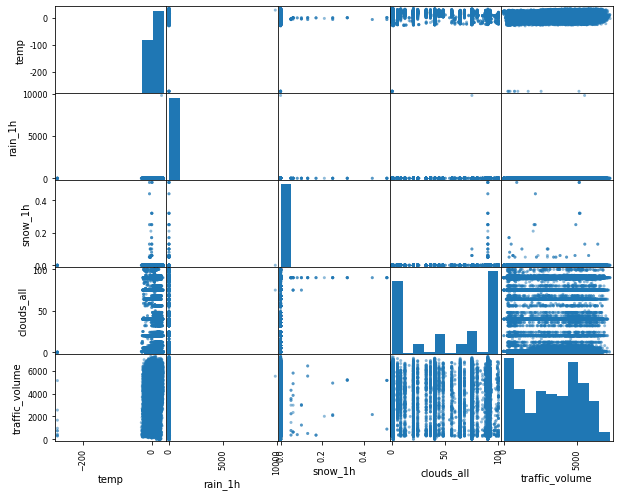

In [49]:
#Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(df_traffic_data[num_vars],figsize=(10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

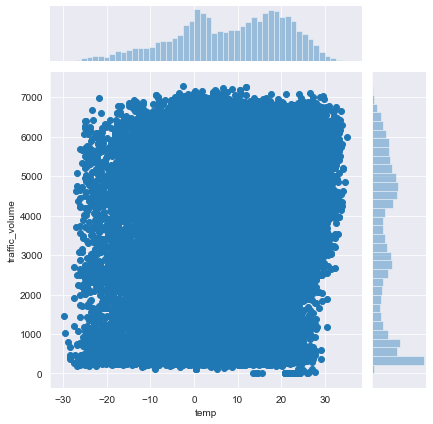

In [50]:
#plotting temperature against traffic volume
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])
plt.show()

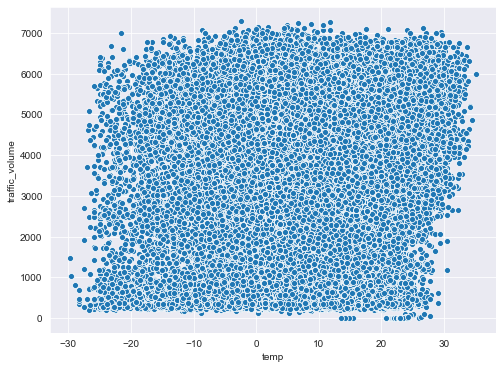

In [51]:
#scatterplot between traffic_volume and temp
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])

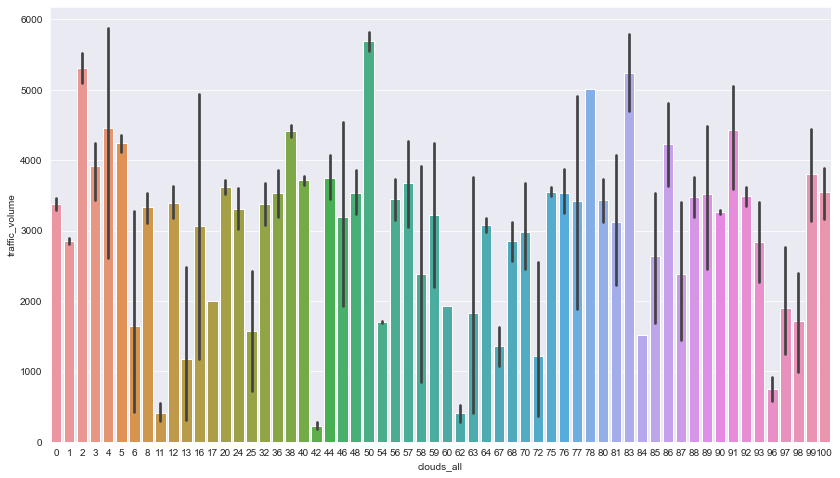

In [52]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df_traffic_data)
plt.show()

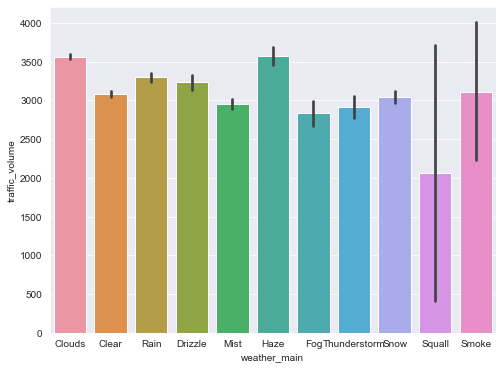

In [53]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df_traffic_data)
plt.show()

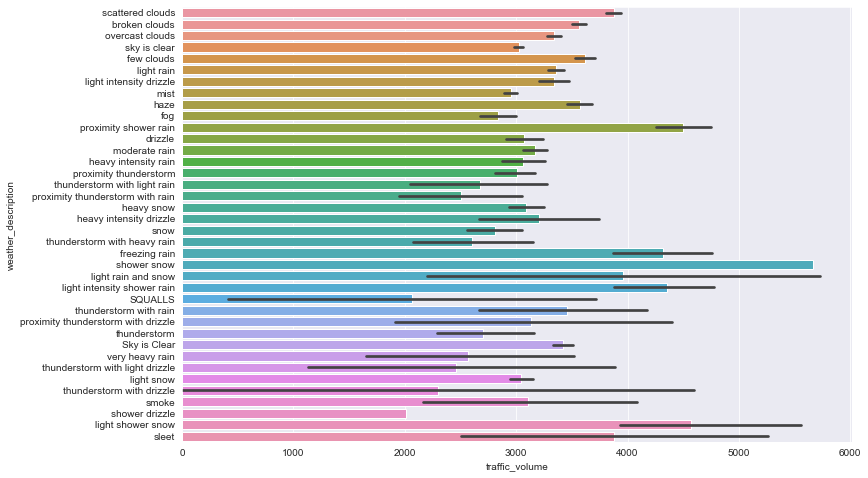

In [54]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = df_traffic_data)
plt.show()

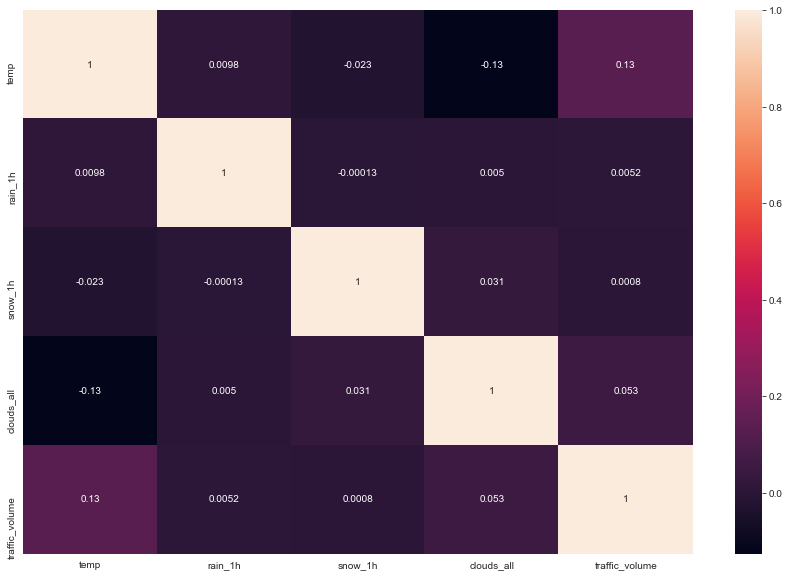

In [55]:
#correlation between different numeric variables. plot shows no strong correlation between traffic and other variables
sns.heatmap(df_traffic_data.corr(), annot=True)
plt.show()

### Feature engineering and Data cleaning

In [56]:
#copying data to new data frame
df_traffic_features = df_traffic_data.copy()

In [57]:
#Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features.date_time)
df_traffic_features['weekday'] = df_traffic_features.date_time.dt.weekday
df_traffic_features['date'] = df_traffic_features.date_time.dt.date
df_traffic_features['hour'] = df_traffic_features.date_time.dt.hour
df_traffic_features['month'] = df_traffic_features.date_time.dt.month
df_traffic_features['year'] = df_traffic_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [58]:
df_traffic_features.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
0,2012-10-02 09:00:00,None,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,1,2012-10-02,9,10,2012
1,2012-10-02 10:00:00,None,16.21,0.0,0.0,75,Clouds,broken clouds,4516,1,2012-10-02,10,10,2012
2,2012-10-02 11:00:00,None,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,1,2012-10-02,11,10,2012
3,2012-10-02 12:00:00,None,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,1,2012-10-02,12,10,2012
4,2012-10-02 13:00:00,None,17.99,0.0,0.0,75,Clouds,broken clouds,4918,1,2012-10-02,13,10,2012


In [59]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features.hour.map(hour_modify)

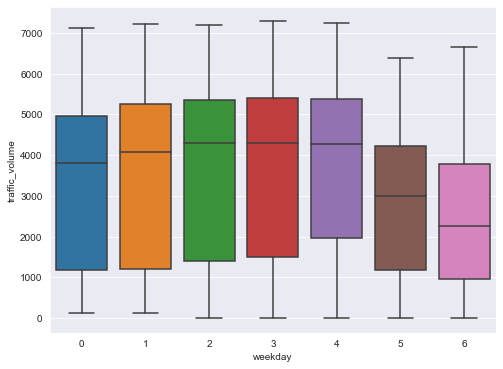

In [60]:
#Traffic volume plotted against weekday. Weekends show less traffic volume.
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df_traffic_features)
plt.show()

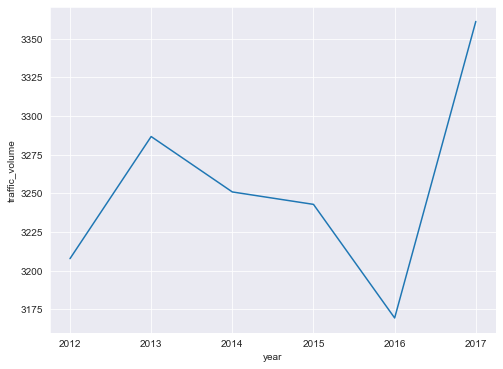

In [61]:
#aggreagating traffic volume over year and plotting 

df_date_traffic = df_traffic_features.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

In [62]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [63]:
#Outlier in temp which was detected earlier needs to be removed
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

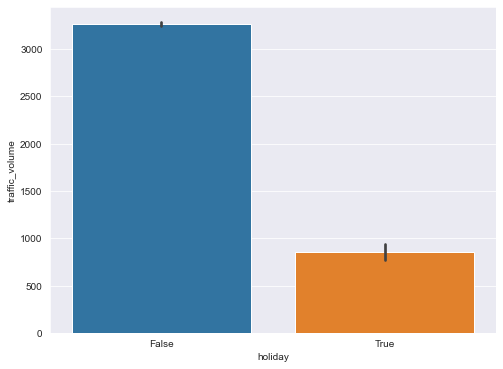

In [64]:
#Traffic volume difference during holiday and non holiday
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df_traffic_features)
plt.show()

In [65]:
#clouds, rain and snow distribution over different weather conditions
df_traffic_features.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume       clouds_all  \
                                              mean  size      count   
weather_description                                                   
SQUALLS                                2061.750000     4          4   
Sky is Clear                           3420.036215  1712       1712   
broken clouds                          3564.464037  3879       3879   
drizzle                                3073.518051   554        554   
few clouds                             3619.433255  1708       1708   
fog                                    2833.751804   693        693   
freezing rain                          4314.000000     2          2   
haze                                   3574.350453   993        993   
heavy intensity drizzle                3206.375000    56         56   
heavy intensity rain                   3057.023256   387        387   
heavy snow                             3085.862010   587        587   
light intensity drizzle                3338.663605   871        871   
light intensity shower rain            4351.545455    11         11   
light rain                             3359.250089  2795       2795   
light rain and snow                    3961.166667     6          6   
light shower snow                      4570.750000     4          4   
light snow                             3045.698027  1318       1318   
mist                                   2951.615268  4611       4611   
moderate rain                          3171.570143  1333       1333   
overcast clouds                        3339.694561  4302       4302   
proximity shower rain                  4501.202128    94         94   
proximity thunderstorm                 3005.149284   489        489   
proximity thunderstorm with drizzle    3131.500000    12         12   
proximity thunderstorm with rain       2507.026316    38         38   
scattered clouds                       3875.658904  2791       2791   
shower drizzle                         2010.000000     1          1   
shower snow                            5664.000000     1          1   
sky is clear                           3023.134193  8838       8838   
sleet                                  3882.000000     2          2   
smoke                                  3103.722222    18         18   
snow                                   2808.035176   199        199   
thunderstorm                           2701.500000    88         88   
thunderstorm with drizzle              2297.000000     2          2   
thunderstorm with heavy rain           2603.857143    56         56   
thunderstorm with light drizzle        2463.375000     8          8   
thunderstorm with light rain           2673.926829    41         41   
thunderstorm with rain                 3456.322581    31         31   
very heavy rain                        2568.833333    18         18   

                                        rain_1h   snow_1h  
                                           mean      mean  
weather_description                                        
SQUALLS                                3.482500  0.000000  
Sky is Clear                           0.000000  0.000000  
broken clouds                          0.000000  0.000000  
drizzle                                0.116986  0.000000  
few clouds                             0.000000  0.000000  
fog                                    0.071558  0.000823  
freezing rain                          0.000000  0.000000  
haze                                   0.037100  0.000000  
heavy intensity drizzle                0.101071  0.000000  
heavy intensity rain                   2.936770  0.000000  
heavy snow                             0.001295  0.000000  
light intensity drizzle                0.170034  0.000000  
light intensity shower rain            0.393636  0.000000  
light rain                             0.134544  0.000082  
light rain and snow                    0.211667  0.000000  
light shower snow                      0.000

In [66]:
df_traffic_features['weather_description'] = df_traffic_features['weather_description'].map(lambda x:x.lower())

In [67]:
#The weather description mostly describes rain, snow, thunderstorms, fog, mist and haze.

#I will create following new columns:
#thunderstorm - True where weather description contains Thunderstorm else False
#fog - True where weather description contains fog else False
#mist - True where weather description contains mist else False
#haze - True where weather description contains haze else False

In [68]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df_traffic_features.loc[df_traffic_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'    

In [69]:
weather = ['thunderstorm','mist','fog','haze']
df_traffic_features.loc[np.logical_not(df_traffic_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [70]:
df_traffic_features.weather_description.value_counts()

other           31491
mist             4611
haze              993
thunderstorm      765
fog               693
Name: weather_description, dtype: int64

In [71]:
#creating dummy variables for these newly created categories in weather description
df_traffic_features = pd.get_dummies(columns=['weather_description'],data=df_traffic_features)

In [72]:
df_traffic_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df_traffic_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

In [73]:
df_traffic_features.columns

Index(['date_time', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'traffic_volume', 'weekday', 'date', 'hour', 'month', 'year', 'fog',
       'haze', 'mist', 'thunderstorm'],
      dtype='object')

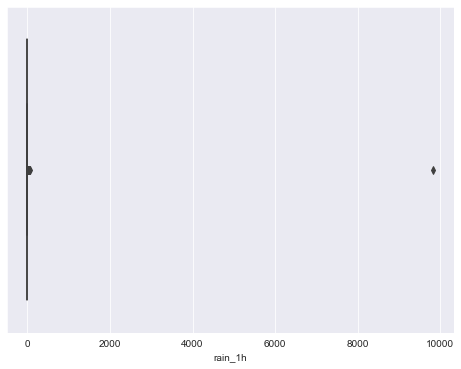

In [74]:
#Plotiing rain data shows one outlier data point. Lets remove it.
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = df_traffic_features)
plt.show()

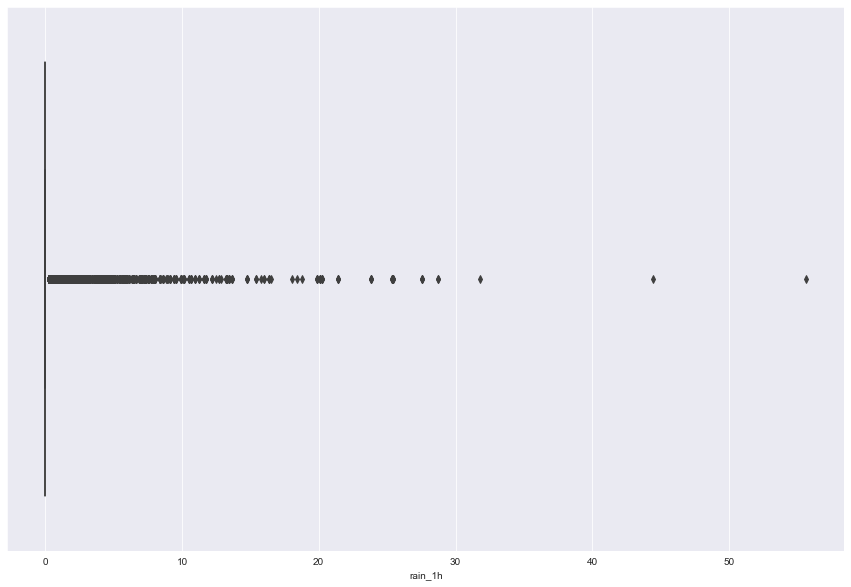

In [75]:
sns.boxplot('rain_1h',data = df_traffic_features.loc[df_traffic_features.rain_1h<2000])

In [76]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df_traffic_features = df_traffic_features.loc[df_traffic_features.rain_1h<2000]
df_traffic_features_temp = df_traffic_features.loc[df_traffic_features.rain_1h>0]
rain_q = pd.DataFrame(pd.qcut(df_traffic_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
df_traffic_cat = df_traffic_features.merge(rain_q,left_index=True, right_index=True, how='left')
df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,date_time,holiday,temp,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2012-10-02 09:00:00,False,15.13,0.0,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,2012-10-02 10:00:00,False,16.21,0.0,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,2012-10-02 11:00:00,False,16.43,0.0,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,2012-10-02 12:00:00,False,16.98,0.0,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,2012-10-02 13:00:00,False,17.99,0.0,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


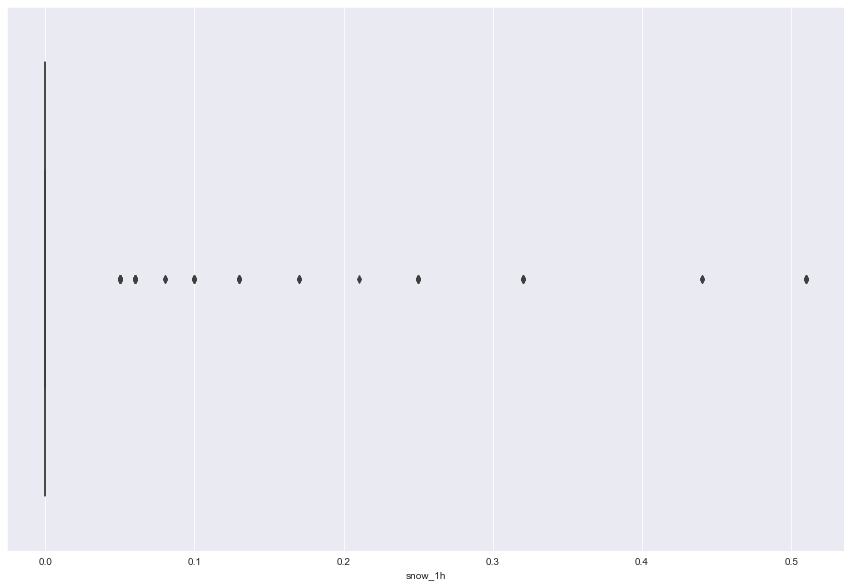

In [77]:
#Plotiing snow data shows that it is extremely skewed as observed during univariate analysis
sns.boxplot('snow_1h',data = df_traffic_features)

In [78]:
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow and 
df_traffic_features.snow_1h[df_traffic_features.snow_1h>0].count()
#63 columns -> change to snow, no_snow

63

## Boxplot for Traffic Volume

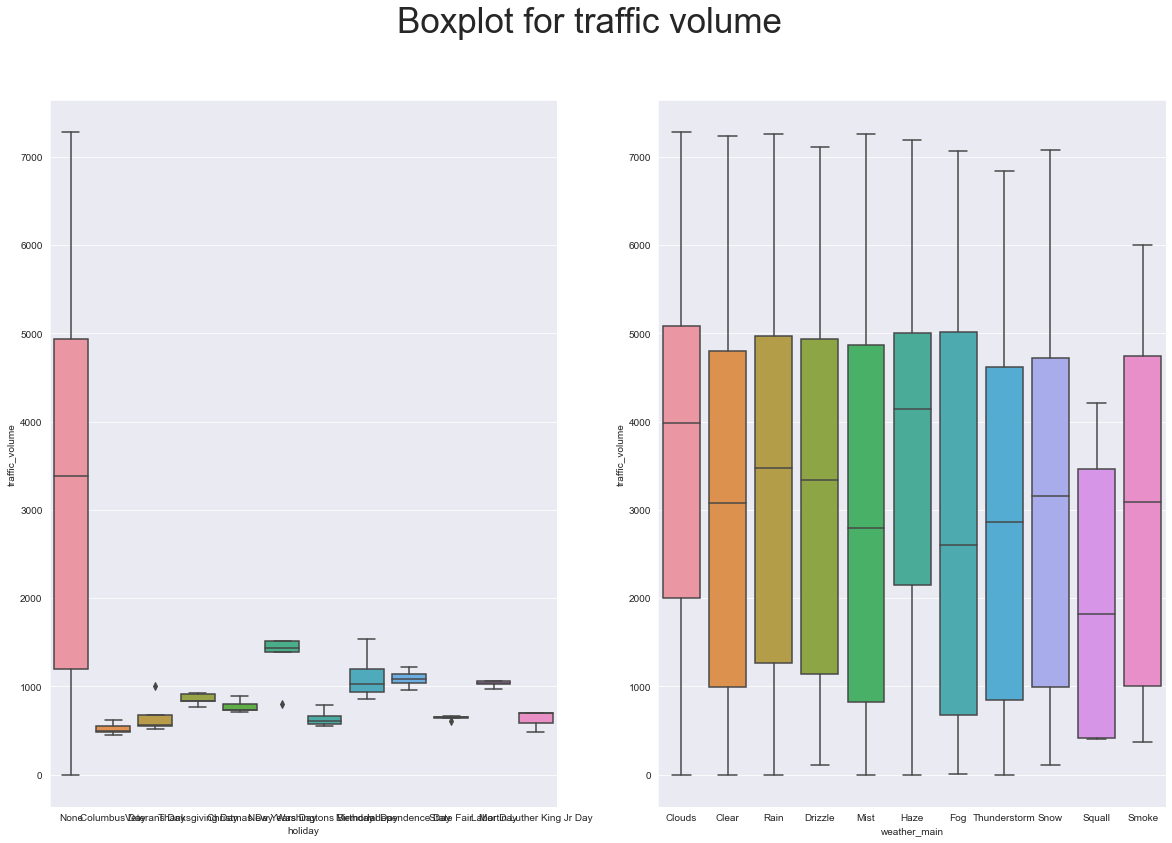

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,13))

fig.suptitle("Boxplot for traffic volume", fontsize=35)

sns.boxplot(x="holiday", y="traffic_volume", data=df,ax=ax1)
sns.boxplot(x="weather_main", y="traffic_volume", data=df,ax=ax2)


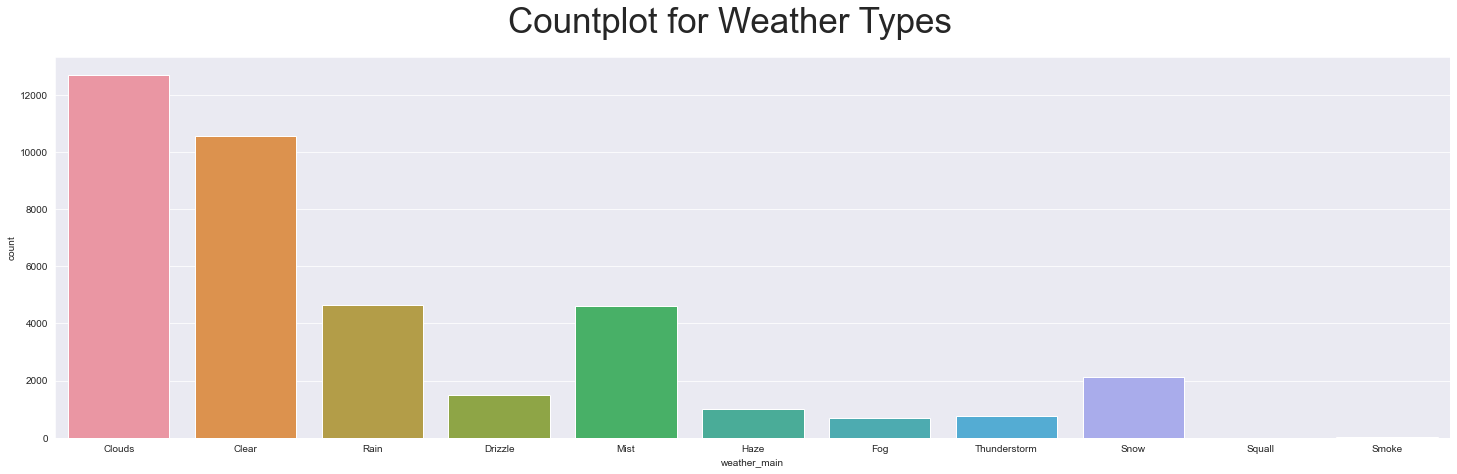

In [80]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,7))

fig.suptitle("Countplot for Weather Types", fontsize=35)

sns.countplot(x="weather_main", data=df,ax=ax1)



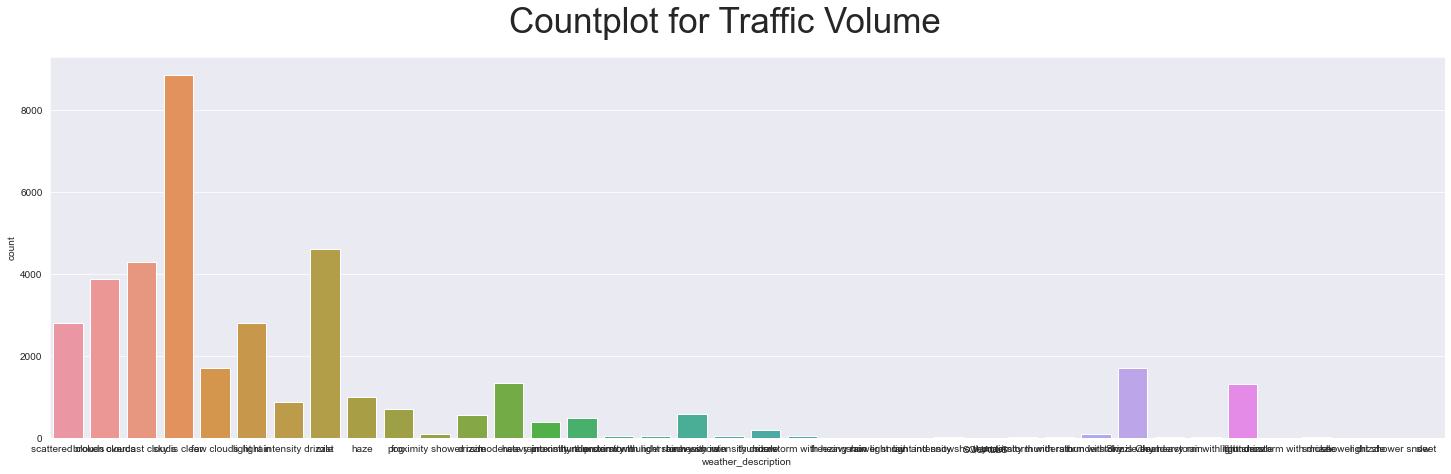

In [81]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,7))

fig.suptitle("Countplot for Traffic Volume", fontsize=35)

sns.countplot(x="weather_description", data=df,ax=ax1)



In [82]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_date_traffic['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [83]:
df_traffic_features.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,2012-10-02 09:00:00,False,15.13,0.0,0.0,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,2012-10-02 10:00:00,False,16.21,0.0,0.0,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,2012-10-02 11:00:00,False,16.43,0.0,0.0,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,2012-10-02 12:00:00,False,16.98,0.0,0.0,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,2012-10-02 13:00:00,False,17.99,0.0,0.0,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


In [84]:
#setting date as index
df_traffic_cat.set_index('date', inplace = True)

In [85]:
df_traffic_cat.columns

Index(['date_time', 'holiday', 'temp', 'snow_1h', 'clouds_all',
       'traffic_volume', 'weekday', 'hour', 'month', 'year', 'fog', 'haze',
       'mist', 'thunderstorm', 'rain_1h'],
      dtype='object')

## Regresion plots

In [86]:
from sklearn.model_selection import cross_val_predict

In [87]:
predicted = cross_val_predict(regr, X, y, cv=10)

NameError: name 'regr' is not defined

<img src="C:/Users/kusha/Downloads/5fd8ce205f392d4d66288fbf/download.png" width=60 height=60 />

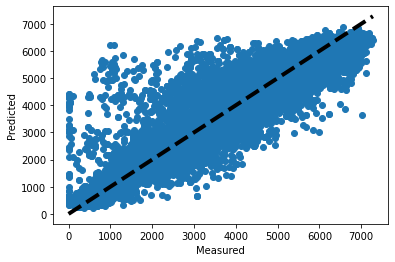

In [90]:
# I have copied the image from Prediction notebook

from IPython.display import Image
Image(filename='C:/Users/kusha/Downloads/5fd8ce205f392d4d66288fbf/download.png')